In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv('D:\Praktikum\iris.csv',sep=",")
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Ngasih label 0 = setosa, 1 = versicolor, 2 = virginica
from sklearn.preprocessing import LabelEncoder
data['Label'] = LabelEncoder().fit_transform(data['Species'])

In [4]:
from sklearn.model_selection import train_test_split
# Definisi Y
y = data['Label']

# Definisi X
x = data.drop(['Species','Label'], axis=1)

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = None, shuffle=False )

In [5]:
#buat model
#Create Decision Tree Classifier Object
clf=DecisionTreeClassifier()

#train Decision Tree Classifier
clf=clf.fit(x_train, y_train)

#predic the responese for test dataset
y_pred=clf.predict(x_test)

In [6]:
#evaluasi model
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7894736842105263


In [7]:
#pip install six

In [8]:
#pip install graphviz

In [9]:
#pip install pydotplus

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [11]:
feature_cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [17]:
from graphviz import Digraph

In [14]:
#conda install graphviz

In [19]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

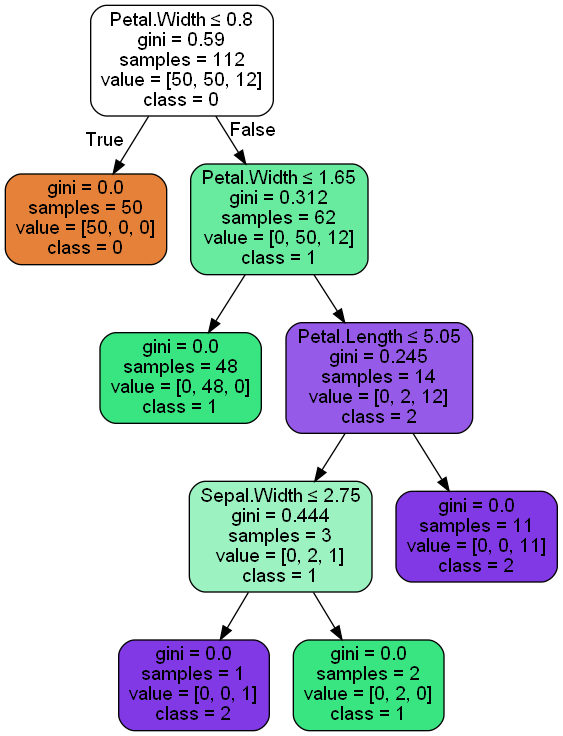

In [20]:
graph.write_png('iris.png')
Image(graph.create_png())
